### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

# Análise Inicial

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/climate_change.csv')
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [3]:
fil = df['Year'] <= 2006
fil2 = df['Year'] > 2006
df_train = df[fil] 
df_test = df[fil2]

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,308.0,1995.662338,7.423197,1983.0000,1989.00000,1996.00000,2002.00000,2008.0000
Month,308.0,6.551948,3.447214,1.0000,4.00000,7.00000,10.00000,12.0000
MEI,308.0,0.275555,0.937918,-1.6350,-0.39875,0.23750,0.83050,3.0010
CO2,308.0,363.226753,12.647125,340.1700,353.02000,361.73500,373.45500,388.5000
CH4,308.0,1749.824513,46.051678,1629.8900,1722.18250,1764.04000,1786.88500,1814.1800
N2O,308.0,312.391834,5.225131,303.6770,308.11150,311.50700,316.97900,322.1820
CFC-11,308.0,251.973068,20.231783,191.3240,246.29550,258.34400,267.03100,271.4940
CFC-12,308.0,497.524782,57.826899,350.1130,472.41075,528.35600,540.52425,543.8130
TSI,308.0,1366.070759,0.399610,1365.4261,1365.71705,1365.98090,1366.36325,1367.3162
Aerosols,308.0,0.016657,0.029050,0.0016,0.00280,0.00575,0.01260,0.1494


In [5]:
X =  df[df.columns[2:-1]]
Y = df.Temp 


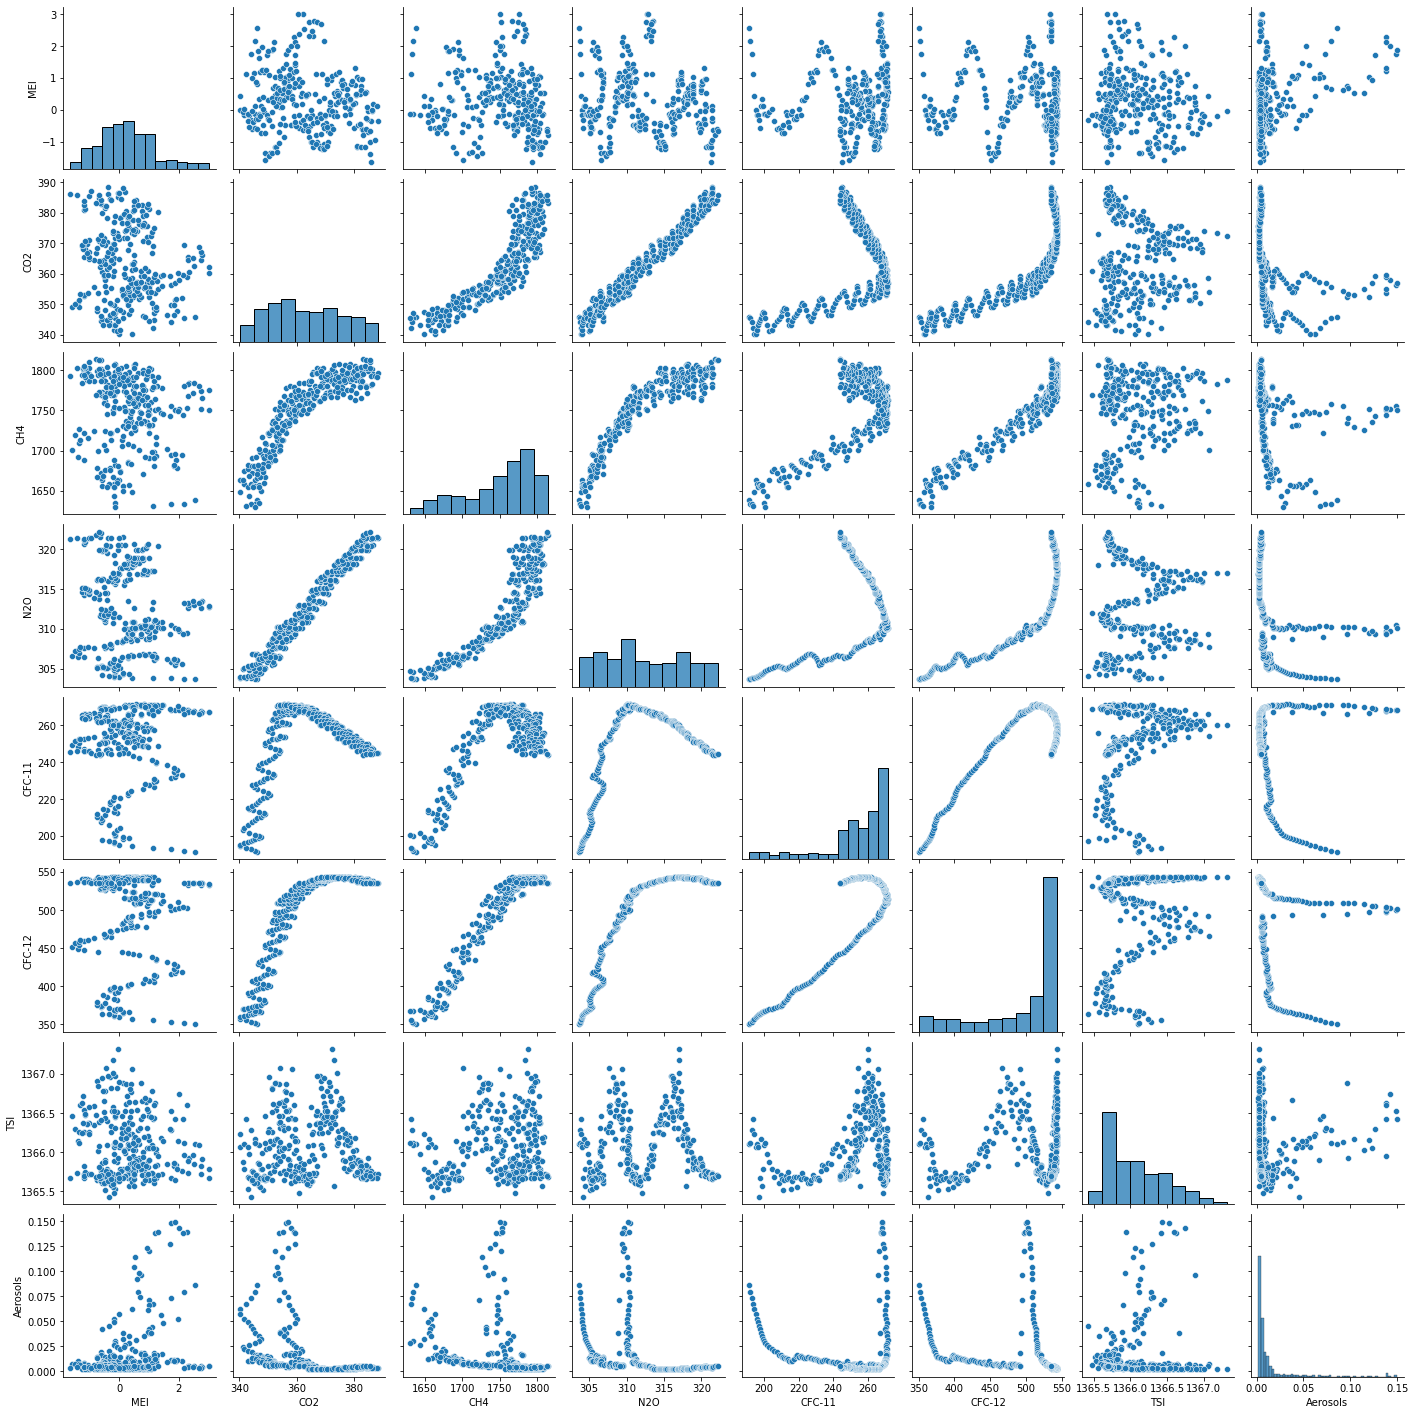

In [6]:
sns.pairplot(X)

In [7]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(X)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(Y, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()

c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     108.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           8.21e-84
Time:                        21:11:05   Log-Likelihood:                 303.02
No. Observations:                 308   AIC:                            -588.0
Df Residuals:                     299   BIC:                            -554.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -127.6958     19.191     -6.654      0.000    -165.462     -89.929
MEI            0.0663      0.006     10.722      0.000       0.054       0.078
CO2            0.0052      0.002      2.375      0.018       0.001       0.010
CH4         6.371e-05      0.000      0.128      0.898      -0.001       0.001
N2O           -0.0169      0.008     -2.161      0.032      -0.032      -0.002
CFC-11        -0.0073      0.001     -4.980      0.000      -0.010      -0.004
CFC-12         0.0043      0.001      4.875      0.000       0.003       0.006
TSI            0.0959      0.014      6.844      0.000       0.068       0.123
Aerosols      -1.5818      0.210     -7.535      0.000      -1.995      -1.169
==============================================================================
Omnibus:                        6.703   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                8.299
Skew:                           0.191   Prob(JB):                       0.0158
Kurtosis:                       3.708   Cond. No.                     8.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

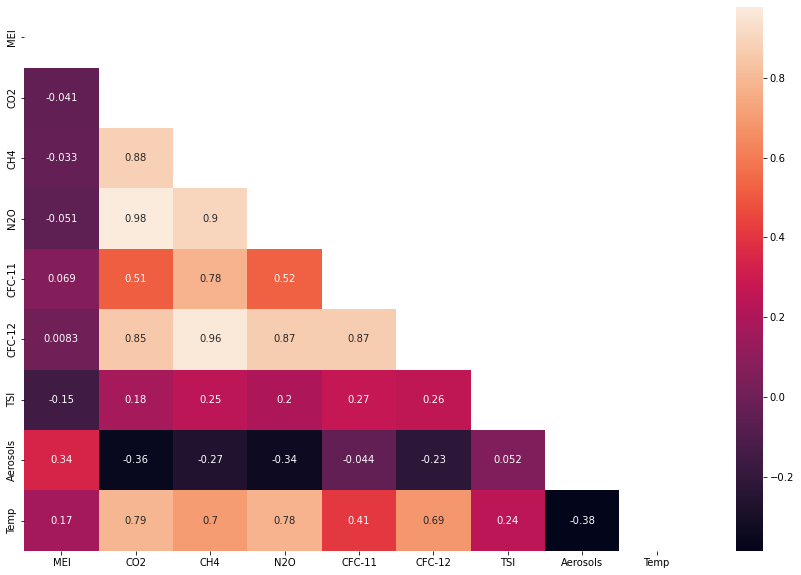

In [8]:
data = df_train[df.columns[2:]]
mask = np.triu(np.ones_like(data.corr()))
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, mask=mask)

Concluisse que há uma necessidade de padronizar ás várias á uma dispariedade muito grande de desvio padrão, além disso quanto ao poder explicativo das váriaveis, entende-se que:

        - O poder explicativo dos gases em geral é forte, entretanto, muito correlacionados entre si, logo o poder explicativo individual é enfraquecido.

        - Logo, é interessante um outro modelo com váriaveis menos correlacionadas.

## Modelo 

In [9]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(X)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(Y, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()

c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     108.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           8.21e-84
Time:                        21:11:06   Log-Likelihood:                 303.02
No. Observations:                 308   AIC:                            -588.0
Df Residuals:                     299   BIC:                            -554.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -127.6958     19.191     -6.654      0.000    -165.462     -89.929
MEI            0.0663      0.006     10.722      0.000       0.054       0.078
CO2            0.0052      0.002      2.375      0.018       0.001       0.010
CH4         6.371e-05      0.000      0.128      0.898      -0.001       0.001
N2O           -0.0169      0.008     -2.161      0.032      -0.032      -0.002
CFC-11        -0.0073      0.001     -4.980      0.000      -0.010      -0.004
CFC-12         0.0043      0.001      4.875      0.000       0.003       0.006
TSI            0.0959      0.014      6.844      0.000       0.068       0.123
Aerosols      -1.5818      0.210     -7.535      0.000      -1.995      -1.169
==============================================================================
Omnibus:                        6.703   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                8.299
Skew:                           0.191   Prob(JB):                       0.0158
Kurtosis:                       3.708   Cond. No.                     8.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
results.resid

0     -0.054070
1     -0.030257
2     -0.003195
3      0.062506
4      0.100137
         ...   
303    0.029887
304    0.032161
305    0.106967
306    0.046802
307   -0.018392
Length: 308, dtype: float64

In [10]:
data = df.copy()
data.drop(inplace=True, columns=['Month','Temp'])

fil3 = data['Year'] > 2006

In [11]:
data['Temp'] = results.predict(X_sm)
df_pred = data[fil3]


In [12]:
r2 = r2_score(df_test['Temp'], df_pred['Temp'])
print('R²:', round(r2,2))

R²: 0.24
